In K-means algorithm we aim to minimize the below **objective function** with respect to r and μ, where r are the coefficients which indicate the cluster that each datapoint belongs to, x are the datapoints and μ are the cluster centers :

![kmeans_objective](https://user-images.githubusercontent.com/55101427/89711984-75a08f80-d996-11ea-9c20-7922eb3f5ec6.png)

The algorithm is based on the following two update steps which iterate  until convergence is achieved (ie. until centers do not change "much"). 

The below formula determines the **"clusters update step"** by assigning each point to the cluster with the closest center. 

![kmeans_clustersupdate](https://user-images.githubusercontent.com/55101427/89712026-d0d28200-d996-11ea-89c0-2ee70bc4af62.png)

The below formula determines the **"centers update step"** by computing the mean of all points in the cluster. Note that the denominator is equal to the number of points assigned to cluster k.

![kmeans_centersupdate](https://user-images.githubusercontent.com/55101427/89712037-e0ea6180-d996-11ea-8910-6145d7f5f211.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def kmeans(X,K):
    
    '''
    inputs : X = 2-dim array dataset
             K = the number of clusters
    outputs : mu_new = the final cluster centers
              labels = labels of the datapoints 
              fig = figure showing the dataset, the locations of the initially randomly chosen cluster centers and 
                    the locations of the final cluster centers determinded by the algorithm
    '''
    r = np.zeros(shape = (X[:,0].size, K))
    mu_old = np.zeros((K,2))
    
    # choose random cluster centers
    xmax = max(abs(X[:,0]))
    ymax = max(abs(X[:,1]))
    l = max(xmax, ymax)
    
    side_length = round(l)
    
    z = np.random.choice( np.concatenate((np.random.random(3),-np.random.random(3))) ,3, replace = False)
    cx = z*side_length

    w = np.random.choice( np.concatenate((np.random.random(3),-np.random.random(3))) ,3, replace = False)
    cy = w*side_length

    cx = np.reshape(cx, (cx.size,1))
    cy = np.reshape(cy, (cy.size,1))
    mu_random = np.concatenate((cx,cy), axis = 1)
    mu_new = np.concatenate((cx,cy), axis = 1)
    
    while np.linalg.norm(mu_new - mu_old) > 0.0001 :
    
        mu_old = mu_new

        # update clusters - see formula above
        for i in range(X.shape[0]) :
            ar = np.array([])
            for k in range(K) :
                ar = np.append(ar,np.linalg.norm(X[i]-mu_new[k]))
            j = np.argmin(ar)
            r[i][j] = 1

        # update centers - see formula above
        for i in range(K) :
            if np.sum(r[:,i]) == 0 :
                continue
            else :
                v = np.reshape(r[:,i], (r[:,i].size,1))
                mu_new[i] = sum(v*X) / np.sum(r[:,i])
    
    labels = np.where(r==1)[1]
        
    return mu_random, mu_new, labels

#### An application that shows the algorithm's main disadvantage

In [3]:
from sklearn.datasets import make_moons

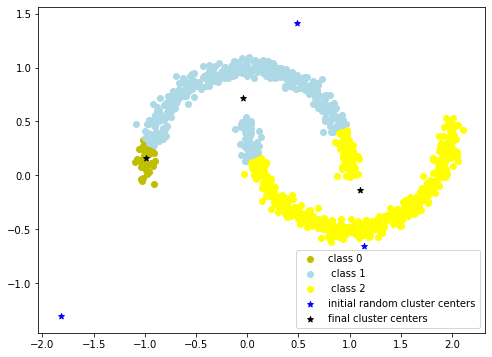

In [4]:
moons = make_moons(n_samples=1000, noise=.05)
dataset_1 = moons[0]
clf = kmeans(dataset_1,3)
labels = clf[2]
x0 = dataset_1[labels==0] ; x1 = dataset_1[labels==1] ;    x2 = dataset_1[labels==2]

plt.figure(figsize=(8,6))
plt.scatter (x0[:,0],x0[:,1], color = 'y')
plt.scatter (x1[:,0],x1[:,1], color = 'lightblue')
plt.scatter (x2[:,0],x2[:,1], color = 'yellow')
i_cen = clf[0]
f_cen = clf[1] 
plt.scatter(i_cen[:,0], i_cen[:,1], marker='*', color = 'blue')
plt.scatter(f_cen[:,0], f_cen[:,1], marker='*', color = 'black')
plt.legend(('class 0',' class 1',' class 2', 'initial random cluster centers', 'final cluster centers'), loc='best')

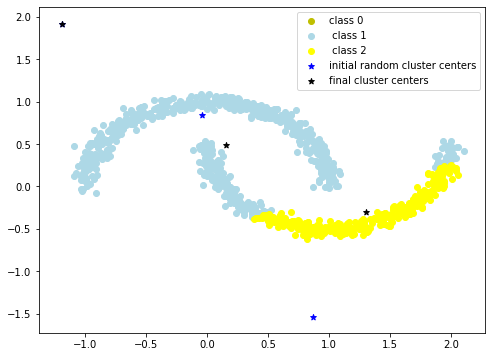

In [5]:
dataset_2 = moons[0]
clf = kmeans(dataset_2,3)
labels = clf[2]
x0 = dataset_2[labels==0] ; x1 = dataset_2[labels==1] ;    x2 = dataset_2[labels==2]

plt.figure(figsize=(8,6))
plt.scatter (x0[:,0],x0[:,1], color = 'y')
plt.scatter (x1[:,0],x1[:,1], color = 'lightblue')
plt.scatter (x2[:,0],x2[:,1], color = 'yellow')
i_cen = clf[0]
f_cen = clf[1] 
plt.scatter(i_cen[:,0], i_cen[:,1], marker='*', color = 'blue')
plt.scatter(f_cen[:,0], f_cen[:,1], marker='*', color = 'black')
plt.legend(('class 0',' class 1',' class 2', 'initial random cluster centers', 'final cluster centers'), loc='best')

Above we see two applications of the k-means algorithm on the same dataset. The above graphs highlight the algorithm's main 
disadvantage(sensitinity) which is the the initial **random choise of the cluster centers**. More specifically in the first case we see that all three randomly chosen centers contribute into forming three clusters. On the other hand, in the second case we see that the **top left** randomly chosen center is so far away from all datapoints with respect to the other two centers so that it is impossible to contribute in forming clusters. The point stays in the same position until algorithm's convergence is achieved and in the end we get only two clusters even if three were initially required.

In [6]:
# below we see a slight variation in the kmeans function. The difference lies in the output of the functions.
# this version is not included in github page.. but I wanted to keep in here as the returned figure is interesting

"""
def kmeans(X,K):
    
    '''
    inputs : X = 2-dim array dataset
             K = the number of clusters
    outputs : mu_new = the final cluster centers
              labels = labels of the datapoints 
              fig = figure showing the dataset, the locations of the initially randomly chosen cluster centers and 
                    the locations of the final cluster centers determinded by the algorithm
    '''
    r = np.zeros(shape = (X[:,0].size, K))
    mu_old = np.zeros((K,2))
    
    # choose random cluster centers
    xmax = max(abs(X[:,0]))
    ymax = max(abs(X[:,1]))
    l = max(xmax, ymax)
    
    side_length = round(l)
    
    z = np.random.choice( np.concatenate((np.random.random(3),-np.random.random(3))) ,3, replace = False)
    cx = z*side_length

    w = np.random.choice( np.concatenate((np.random.random(3),-np.random.random(3))) ,3, replace = False)
    cy = w*side_length

    cx = np.reshape(cx, (cx.size,1))
    cy = np.reshape(cy, (cy.size,1))
    mu_random = np.concatenate((cx,cy), axis = 1)
    mu_new = np.concatenate((cx,cy), axis = 1)
    
    while np.linalg.norm(mu_new - mu_old) > 0.0001 :
    
        mu_old = mu_new

        # update clusters - see formula above
        for i in range(X.shape[0]) :
            ar = np.array([])
            for k in range(K) :
                ar = np.append(ar,np.linalg.norm(X[i]-mu_new[k]))
            j = np.argmin(ar)
            r[i][j] = 1

        # update centers - see formula above
        for i in range(K) :
            if np.sum(r[:,i]) == 0 :
                continue
            else :
                v = np.reshape(r[:,i], (r[:,i].size,1))
                mu_new[i] = sum(v*X) / np.sum(r[:,i])
    
    labels = np.where(r==1)[1]
    #labels = np.reshape(labels,(labels.size,1))
    
    fig, ax = plt.subplots()
    ax.scatter(X[:,0], X[:,1], color = 'lightblue')
    ax.scatter(mu_random[:,0], mu_random[:,1], color = 'black', marker = '*', label='initial random cluster centers')
    ax.scatter(mu_new[:,0], mu_new[:,1], color = 'blue', marker = '*', label='final cluster centers')
    ax.legend(loc='best')
    plt.close()
        
    return mu_new, labels, fig
"""

"\ndef kmeans(X,K):\n    \n    '''\n    inputs : X = 2-dim array dataset\n             K = the number of clusters\n    outputs : mu_new = the final cluster centers\n              labels = labels of the datapoints \n              fig = figure showing the dataset, the locations of the initially randomly chosen cluster centers and \n                    the locations of the final cluster centers determinded by the algorithm\n    '''\n    r = np.zeros(shape = (X[:,0].size, K))\n    mu_old = np.zeros((K,2))\n    \n    # choose random cluster centers\n    xmax = max(abs(X[:,0]))\n    ymax = max(abs(X[:,1]))\n    l = max(xmax, ymax)\n    \n    side_length = round(l)\n    \n    z = np.random.choice( np.concatenate((np.random.random(3),-np.random.random(3))) ,3, replace = False)\n    cx = z*side_length\n\n    w = np.random.choice( np.concatenate((np.random.random(3),-np.random.random(3))) ,3, replace = False)\n    cy = w*side_length\n\n    cx = np.reshape(cx, (cx.size,1))\n    cy = np.reshape(cy